[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/WCC-Engineering/ENGR240/blob/main/Class%20Demos%20and%20Activities/Week%202/maclaurin_sine_functions_loops.ipynb)

# MacLaurin Series Approximation for Sine Using Functions and Loops

## ENGR& 240: Engineering Computations
### Introduction to Scientific Computing with Python

This demo builds on the Week 1 MacLaurin series demonstration by refactoring the code to use functions and loops. We'll see how these programming structures make the code more elegant, reusable, and efficient.

## Introduction

The MacLaurin series for sine is a power series expansion about x = 0:

$$\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \cdots$$

In Week 1, we calculated each term separately with explicit computations. Today, we'll see how to generalize this using:

1. **Functions**: Reusable blocks of code that perform specific tasks
2. **Loops**: Structures that allow us to repeat operations with changing variables

These programming structures are fundamental to writing efficient, maintainable, and scalable code.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math  # For factorial calculations
import time

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Function for MacLaurin Sine Terms

Let's create a function that calculates each term in the MacLaurin series for sine. This allows us to easily compute any term in the series.

In [6]:
def sine_term(x, n):
    """
    Calculate the nth term in the MacLaurin series for sine.

    Parameters:
    x (float or array): Input value(s) in radians
    n (int): Term number (0-based index)

    Returns:
    float or array: Value of the nth term in the series
    """
    # nth term has power 2n+1 and alternates sign
    power = 2*n + 1
    sign = (-1)**n  # Alternates: 1, -1, 1, -1, ...

    return sign * (x**power) / math.factorial(power)

# Test the sine_term function
x_test = np.pi/4  # 45 degrees
print(f"1st term at π/4: {sine_term(x_test, 0):.8f}")  # x
print(f"2nd term at π/4: {sine_term(x_test, 1):.8f}")  # -x^3/3!
print(f"3rd term at π/4: {sine_term(x_test, 2):.8f}")  # x^5/5!

1st term at π/4: 0.78539816
2nd term at π/4: -0.08074551
3rd term at π/4: 0.00249039


## A Complete MacLaurin Sine Function

Now let's create a function that computes the MacLaurin series approximation of sine to a specified number of terms. This function will use a loop to sum the terms.

In [7]:
def maclaurin_sine(x, num_terms):
    """
    Calculate the MacLaurin series approximation of sine using the specified number of terms.

    Parameters:
    x (float or array): Input value(s) in radians
    num_terms (int): Number of terms to include in the approximation

    Returns:
    float or array: Sine approximation
    """
    result = 0

    for n in range(num_terms):
        result += sine_term(x, n)

    return result

# Test the maclaurin_sine function with different numbers of terms
x_test = np.pi/4  # 45 degrees
true_value = np.sin(x_test)

print(f"True sine(π/4) = {true_value:.8f}")

for terms in range(1, 6):
    approx = maclaurin_sine(x_test, terms)
    error = abs(approx - true_value)
    print(f"{terms}-term approximation: {approx:.8f}, absolute error: {error:.8f}")

True sine(π/4) = 0.70710678
1-term approximation: 0.78539816, absolute error: 0.07829138
2-term approximation: 0.70465265, absolute error: 0.00245413
3-term approximation: 0.70714305, absolute error: 0.00003626
4-term approximation: 0.70710647, absolute error: 0.00000031
5-term approximation: 0.70710678, absolute error: 0.00000000


## Setting Up for Visualization

Now we can use our functions to create the same visualizations as in Week 1, but with much cleaner code.

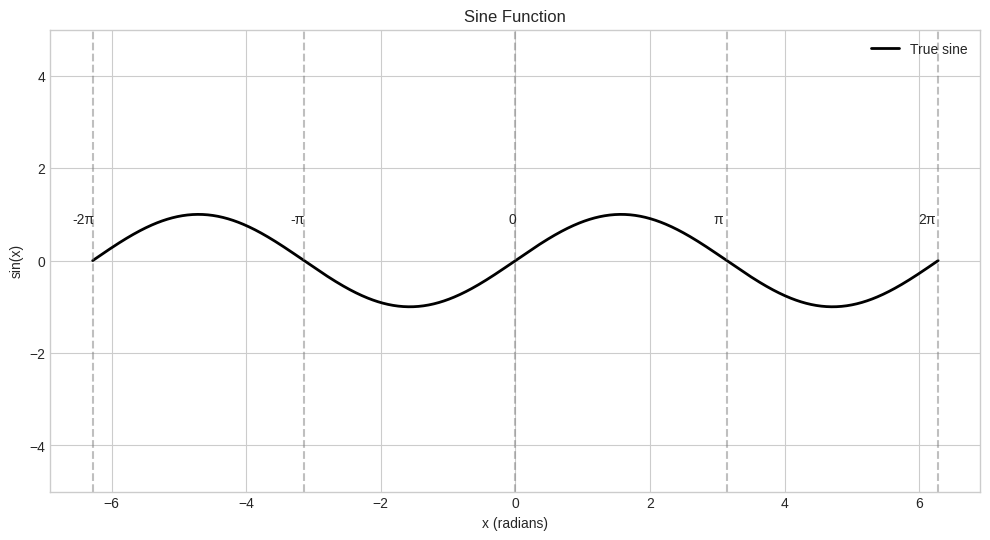

In [8]:
# Create x values spanning -2π to 2π
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Compute actual sine values
true_sine = np.sin(x)

# Create a helper function to draw plots with consistent style
def plot_sine_approximations(x, true_sine, approximations, title):
    """
    Plot the true sine function along with various approximations.

    Parameters:
    x (array): x-axis values
    true_sine (array): True sine values
    approximations (list of tuples): List of (values, label, color) for each approximation
    title (str): Plot title
    """
    plt.figure(figsize=(12, 6))

    # Plot true sine function
    plt.plot(x, true_sine, 'k-', linewidth=2, label='True sine')

    # Plot approximations
    for values, label, color in approximations:
        plt.plot(x, values, color=color, linewidth=1.5, label=label)

    plt.title(title)
    plt.xlabel('x (radians)')
    plt.ylabel('sin(x)')
    plt.grid(True)

    # Add vertical lines at π intervals
    plt.axvline(x=-2*np.pi, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=-np.pi, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=np.pi, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=2*np.pi, color='gray', linestyle='--', alpha=0.5)

    # Add text labels for π values
    plt.text(-2*np.pi-0.3, 0.8, '-2π')
    plt.text(-np.pi-0.2, 0.8, '-π')
    plt.text(-0.1, 0.8, '0')
    plt.text(np.pi-0.2, 0.8, 'π')
    plt.text(2*np.pi-0.3, 0.8, '2π')

    # Set y-axis limits to -5 to 5
    plt.ylim(-5, 5)

    plt.legend()
    plt.show()

# Plot the true sine function
plot_sine_approximations(x, true_sine, [], 'Sine Function')

## Plotting Approximations with Increasing Terms

Now let's compute and plot multiple approximations with increasing numbers of terms.

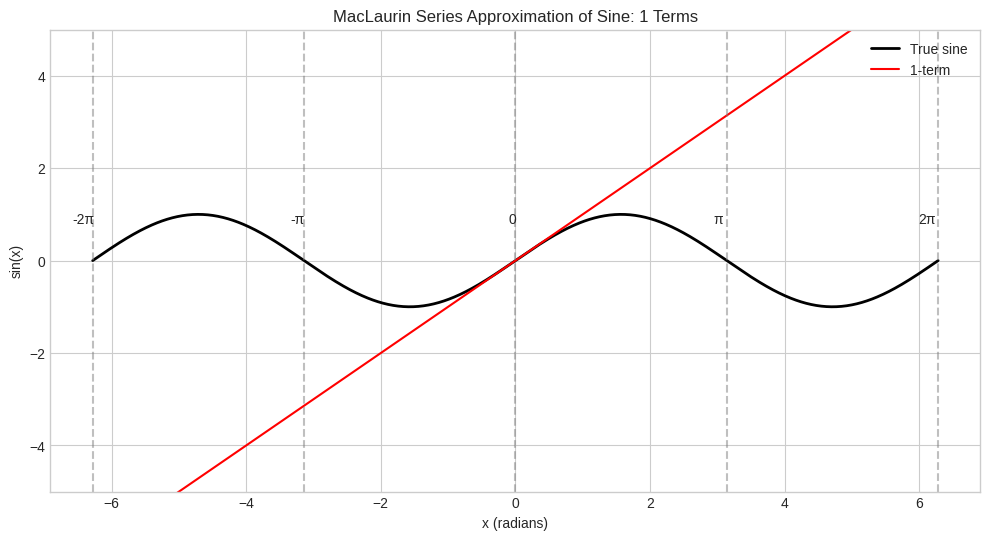

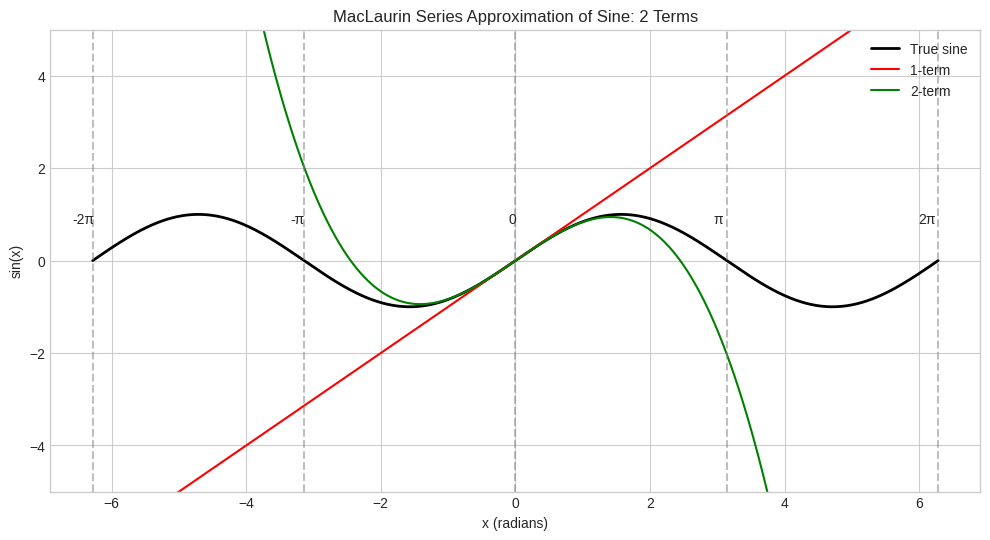

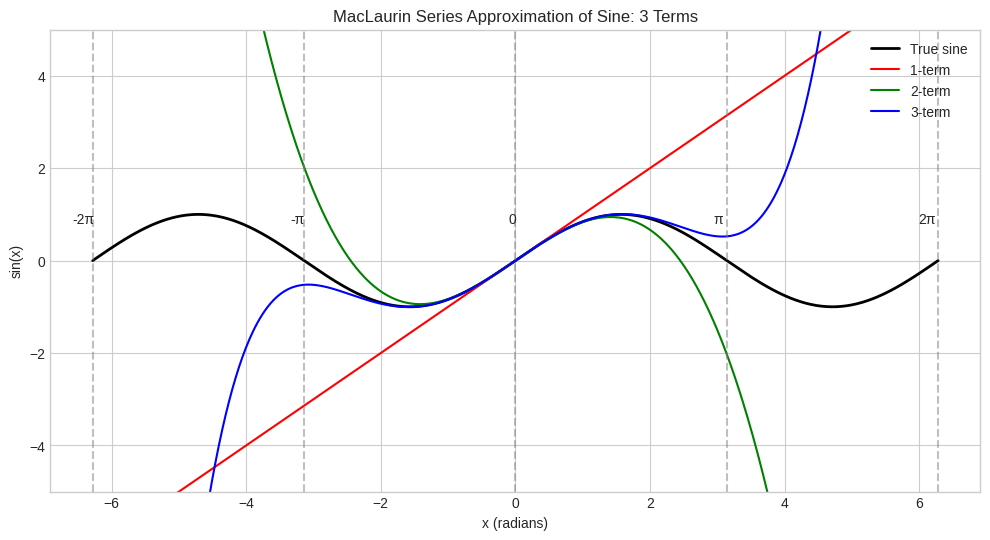

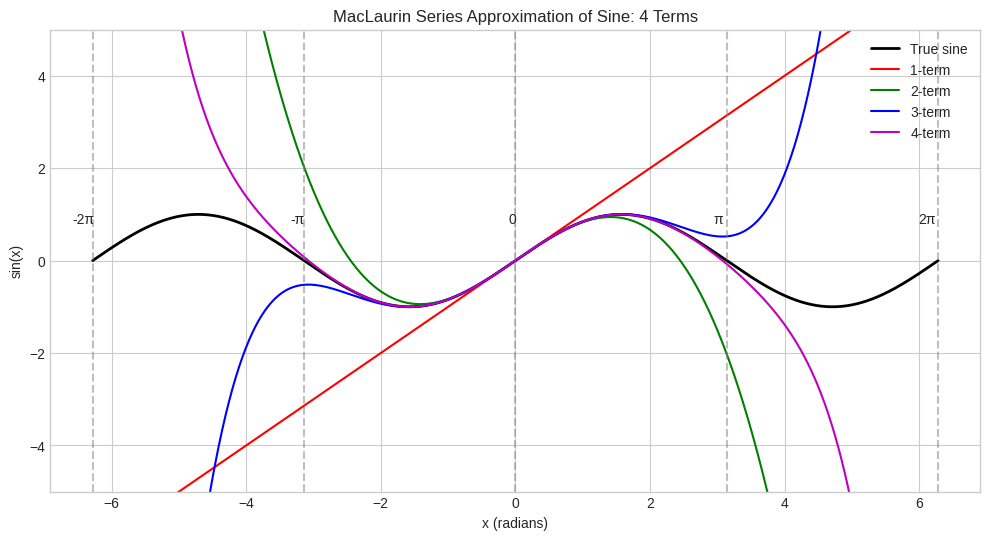

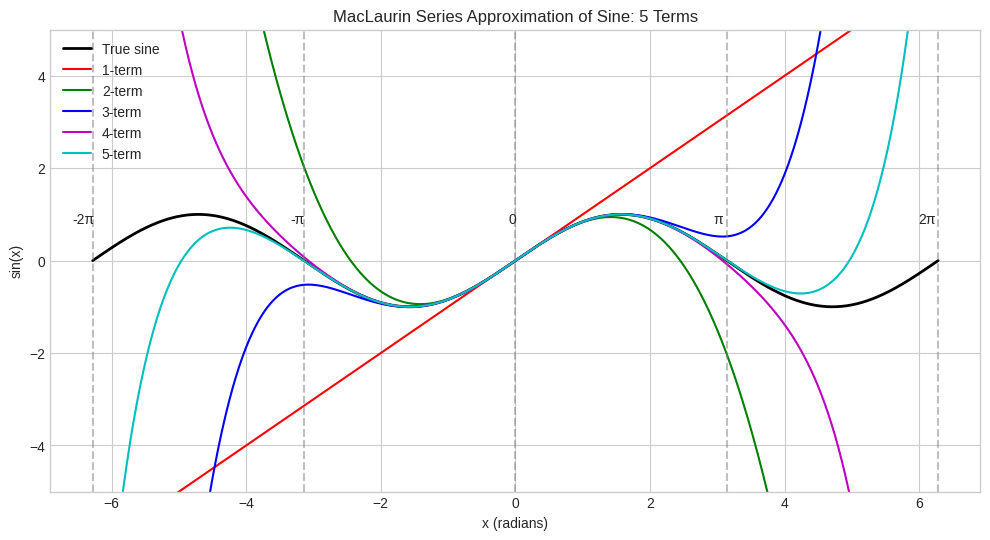

In [9]:
# Calculate approximations with 1 to 5 terms
approximations = []
colors = ['r', 'g', 'b', 'm', 'c']

for i in range(1, 6):
    approx = maclaurin_sine(x, i)
    label = f'{i}-term'
    approximations.append((approx, label, colors[i-1]))

    # Plot approximations incrementally to show improvement
    title = f'MacLaurin Series Approximation of Sine: {i} Terms'
    plot_sine_approximations(x, true_sine, approximations[:i], title)

## Comparing Approximation Accuracy at Specific Points

Let's examine the numerical values at specific points to better understand the increasing accuracy.

In [10]:
# Create a table showing approximation values at specific points
import pandas as pd
from IPython.display import display, HTML

# Create test points
test_points = np.array([0, np.pi/6, np.pi/4, np.pi/2, np.pi])
test_points_labels = ['0', 'π/6', 'π/4', 'π/2', 'π']
true_values = np.sin(test_points)

# Create a function to generate data for tables
def generate_comparison_tables(test_points, test_points_labels, true_values, max_terms=5):
    """
    Generate comparison tables for approximation values and errors.

    Parameters:
    test_points (array): Points to evaluate
    test_points_labels (list): Labels for the test points
    true_values (array): True sine values
    max_terms (int): Maximum number of terms to include
    """
    # Dictionary to hold approximation values
    data = {'x': test_points_labels, 'True Sine': true_values}

    # Calculate approximations for each number of terms
    for i in range(1, max_terms + 1):
        approx_values = maclaurin_sine(test_points, i)
        data[f'{i}-term'] = approx_values

    # Create values DataFrame
    values_df = pd.DataFrame(data)

    # Dictionary to hold error values
    error_data = {'x': test_points_labels}

    # Calculate errors for each approximation
    for i in range(1, max_terms + 1):
        errors = np.abs(data[f'{i}-term'] - true_values)
        error_data[f'{i}-term Error'] = errors

    # Create errors DataFrame
    errors_df = pd.DataFrame(error_data)

    # Display the tables
    display(HTML("<h3>Sine Approximation Values</h3>"))
    display(values_df)

    display(HTML("<h3>Absolute Error in Approximations</h3>"))
    display(errors_df)

# Set display precision to 8 decimal places
pd.set_option('display.precision', 8)

# Generate and display tables
generate_comparison_tables(test_points, test_points_labels, true_values)

,x,True Sine,1-term,2-term,3-term,4-term,5-term
0,0,0.00000000e+00,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,π/6,5.00000000e-01,0.52359878,0.49967418,0.50000213,0.49999999,0.50000000
2,π/4,7.07106781e-01,0.78539816,0.70465265,0.70714305,0.70710647,0.70710678
3,π/2,1.00000000e+00,1.57079633,0.92483223,1.00452486,0.99984310,1.00000354
4,π,1.22464680e-16,3.14159265,-2.02612013,0.52404391,-0.07522062,0.00692527


,x,1-term Error,2-term Error,3-term Error,4-term Error,5-term Error
0,0,0.00000000,0.00000000,0.00000000,0.00000000e+00,0.00000000e+00
1,π/6,0.02359878,0.00032582,0.00000213,8.13097673e-09,2.02799444e-11
2,π/4,0.07829138,0.00245413,0.00003626,3.11611369e-07,1.75031967e-09
3,π/2,0.57079633,0.07516777,0.00452486,1.56898601e-04,3.54258429e-06
4,π,3.14159265,2.02612013,0.52404391,7.52206159e-02,6.92527071e-03


## Exploring a Larger Range

Let's see how our approximations perform over a larger range of x values.

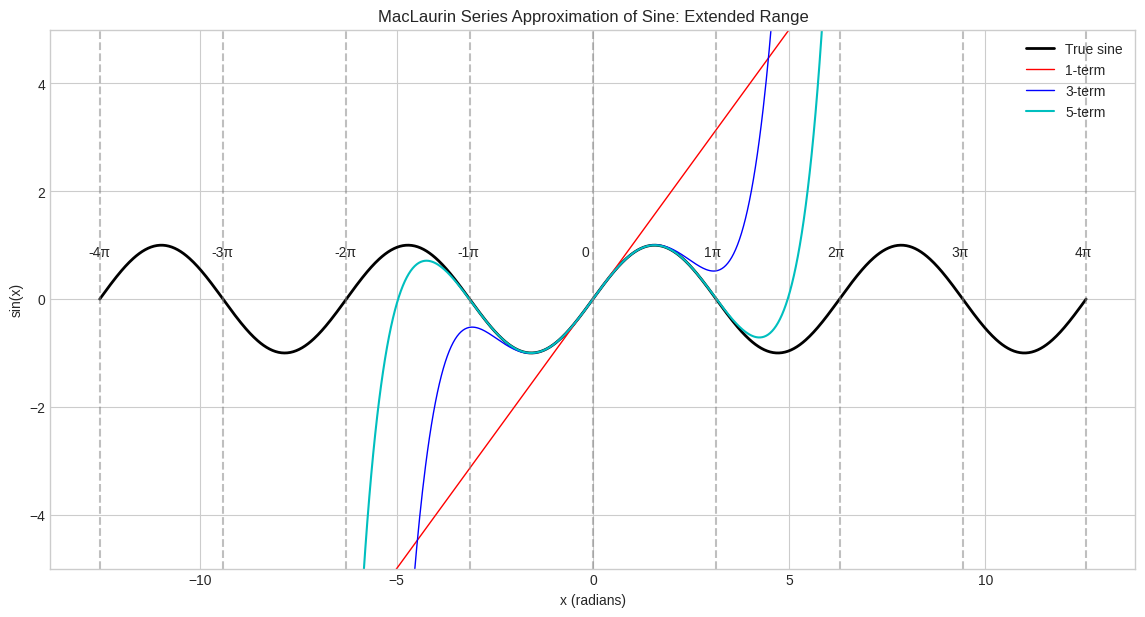

In [11]:
# Create x values spanning -4π to 4π for a larger view
x_large = np.linspace(-4*np.pi, 4*np.pi, 1000)

# Calculate true sine values
true_sine_large = np.sin(x_large)

# Calculate selected approximations
approx1 = maclaurin_sine(x_large, 1)
approx3 = maclaurin_sine(x_large, 3)
approx5 = maclaurin_sine(x_large, 5)

# Plot approximations on larger range
plt.figure(figsize=(14, 7))
plt.plot(x_large, true_sine_large, 'k-', linewidth=2, label='True sine')
plt.plot(x_large, approx1, 'r-', linewidth=1, label='1-term')
plt.plot(x_large, approx3, 'b-', linewidth=1, label='3-term')
plt.plot(x_large, approx5, 'c-', linewidth=1.5, label='5-term')

plt.title('MacLaurin Series Approximation of Sine: Extended Range')
plt.xlabel('x (radians)')
plt.ylabel('sin(x)')
plt.grid(True)

# Add vertical lines at π intervals using a loop
for i in range(-4, 5):
    plt.axvline(x=i*np.pi, color='gray', linestyle='--', alpha=0.5)
    plt.text(i*np.pi-0.3, 0.8, f'{i}π' if i != 0 else '0')

# Set y-axis limits
plt.ylim(-5, 5)
plt.legend()
plt.show()

## Advantages of Using Functions and Loops

Let's reflect on the benefits of using functions and loops in our code:

1. **Code Reusability**: By using Python's standard library functions like `math.factorial()` and our own custom functions, we can reuse them throughout our code without duplicating logic.

2. **Improved Readability**: The code is more organized and easier to understand with descriptive function names that tell us what each part does.

3. **Scalability**: Adding more terms to our approximation is as simple as changing the `num_terms` parameter—no need to write new equations.

4. **Maintainability**: If we need to fix a bug or improve an algorithm, we only need to change it in one place.

5. **Abstraction**: Functions let us work with complex operations at a higher level of abstraction, focusing on the "what" rather than the "how".

6. **Parameter Exploration**: We can easily experiment with different numbers of terms without rewriting code.

Compare this structured approach to the Week 1 approach, where we explicitly coded each calculation separately. The new approach is more elegant, flexible, and follows software engineering best practices.